<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/tensorflow.keras/mnist_%E6%89%8B%E5%AF%AB_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# mac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.datasets import mnist
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# import pandas as pd
# cth_word = pd.DataFrame(x_train[c])
# cth_word

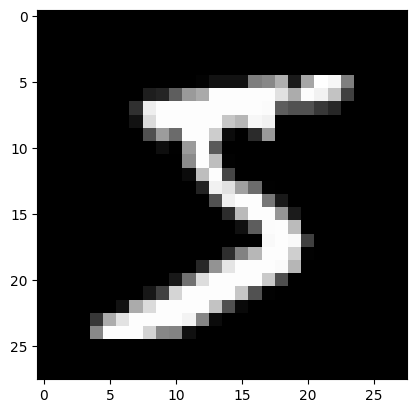

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# import random
# c = random.randint(0, x_train.shape[0] - 1)
# plt.axis("off") 
# plt.title(f"{c}th word")
# plt.imshow(x_train[c], cmap="gray") # 灰階 _r 圖片顏色翻轉
# colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")

激活函式的選擇很重要

輸出層: 看狀況

中間層: relu family(m=1)

In [ ]:
# 建立模型
# 第一種: 蛋糕支架(Seqential), 堆上一層(Layers)
# Layers: Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# mlp = Sequential()
# # layes units
# mlp.add(Dense(128, activation="relu", input_dim=784))
# # param:128 * 10 (神經元的連結) + 10(10個輸出, 10個激活 ->> 10個bias)
# mlp.add(Dense(10, activation="softmax"))
# mlp.summary()
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 +10(bias)
    Dense(10, activation="softmax")#
]
model = Sequential(layers)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 確定模型訓練方式....等
# 隨機梯度下降 (隨便選一組weight) (負梯度方向移動)
# loss: 最後輸出一個: binary_crossentropy 最後輸出多個 categorical_crossentropy
# lose: mse, mae continuous output
# optimizer: adam
# mlp.compile(
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
#     optimizer="adam")
# crossentropy:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

$ p_i = 正確答案 $,\
$ q_i = 預測值 $,

$ categorical crossentropy(標準ce) = \sum p_i log\frac{1}{q_i}$,\
如果你最後輸出只有一個的時候你要使用 BinaryCrossentropy,

因為你輸出的q -> q: 1 這種東西 (1-q): 另外一種東西\,

$ binary crossentropy = p log \frac {1}{q} + (1-p) log \frac {1}{1-q} $ 

In [ ]:
# 2.答案預處理(One-hot encoding)
# 希望的樣子:[p0, p1,.....,p9] 1,2,3,4...0
# 5:[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# 可能輸出:[0, 0, 0.2, 0, 0.8, 0, 0, 0, 0, 0]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])
     

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 資料預處理 weight 調整
# 1. 題目預處理(Normalize)
# keras在準備隨機那組weights, 跟Normalize的圖片比較搭
# 1. 第一組方式: x_train /255 0 ~ 1 第二種方式 -1 ~ 1
# 攤開 --> Keras MlP 規定一定要攤開成為1D
# x_train_shape = x_train.reshape(x_train.shape[0], x_train.shape[1]**2) /255 
# x_test_shape = x_test.reshape(x_test.shape[0], x_train.shape[1]**2) /255 
# DEMO
# x_test_shape[0]

import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
# tensorflow隨機的weight有配合
# reshape你可以把一個位置替換成-1(讓他自己算)
# x_train.reshape(60000, 784)
x_train_norm = x_train.reshape(-1, 784)/255.0
x_test_norm = x_test.reshape(-1, 784)/255.0
print(x_train_norm.shape)
print(x_test_norm.shape)


(60000, 784)
(10000, 784)


In [ ]:
# batch 通常100~200 修正一次 看幾筆做一次梯度下降
# epochs: train full data times
# ex 60000 samples ,200 batch_size ,10 epochs , 60000 * 10 / 200 = 3000 edit_times
# verbose 去掉進度條
# model.fit(
#     x_train_shape,
#     y_train_cat,
#     batch_size=100,
#     epochs=4,
#     validation_split=0.1,
#     verbose=2)
# val_loss validation_split

# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("mnist.h5", save_best_only=True), # find the best val_loss
    EarlyStopping(patience=5, restore_best_weights=True) # ealystop
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
540/540 [==============================] - 3s 5ms/step - loss: 0.3204 - accuracy: 0.9210 - val_loss: 0.1214 - val_accuracy: 0.9693
Epoch 2/40
540/540 [==============================] - 2s 3ms/step - loss: 0.1192 - accuracy: 0.9653 - val_loss: 0.0960 - val_accuracy: 0.9728
Epoch 3/40
540/540 [==============================] - 2s 4ms/step - loss: 0.0854 - accuracy: 0.9749 - val_loss: 0.0806 - val_accuracy: 0.9770
Epoch 4/40
540/540 [==============================] - 2s 3ms/step - loss: 0.0667 - accuracy: 0.9811 - val_loss: 0.0744 - val_accuracy: 0.9795
Epoch 5/40
540/540 [==============================] - 2s 3ms/step - loss: 0.0544 - accuracy: 0.9844 - val_loss: 0.0692 - val_accuracy: 0.9807
Epoch 6/40
540/540 [==============================] - 1s 3ms/step - loss: 0.0451 - accuracy: 0.9872 - val_loss: 0.0670 - val_accuracy: 0.9818
Epoch 7/40
540/540 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9892 - val_loss: 0.0658 - val_accuracy: 0.9820
Epoch 

In [ ]:

# import math
# cases = [
#     (0.9999, 0.0001),
#     (0.5, 0.5),
#     (0.0001, 0.9999),
#     (0.6, 0.4)
# ]
# for q1, q2 in cases:
#     ce = 0.6 * math.log(1/q1, 2) + 0.4 * math.log(1/q2, 2)
#     print(q1, q2, "->", ce)

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9784


[0.06971865892410278, 0.9783999919891357]

如果你在tf裡, 你的答案都是帶one-hot encoding 不是的畫 都帶原本

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
        index=["{}(true)".format(i) for i in range(10)],
        columns=["{}(pred)".format(i) for i in range(10)])

313/313 [==============================] - 0s 1ms/step


,0(pred),1(pred),2(pred),3(pred),4(pred),5(pred),6(pred),7(pred),8(pred),9(pred)
0(true),969,1,0,2,1,0,2,1,2,2
1(true),0,1126,3,0,0,0,2,1,3,0
2(true),1,2,1007,4,3,0,1,6,8,0
3(true),0,0,3,991,0,3,0,4,4,5
4(true),0,0,4,0,964,0,3,2,2,7
5(true),2,0,0,13,1,863,3,1,7,2
6(true),4,3,1,1,5,6,932,1,5,0
7(true),1,4,9,4,1,0,0,1003,3,3
8(true),1,0,3,6,3,1,1,3,954,2
9(true),1,4,0,5,12,1,0,8,3,975


In [ ]:
# import numpy as np
# # predictions = (mlp.predict(x_test_shape) > 0.5)
# from sklearn.metrics import confusion_matrix
# # argmax 最大值的索引值 axis = 選比較維度
# predictions = np.argmax(model.predict(x_test_norm), axis=1)
# predictions
# pd.DataFrame(confusion_matrix(y_test,predictions))
# # columns 欄位=錯誤標籤 row_欄位 = 正確標籤

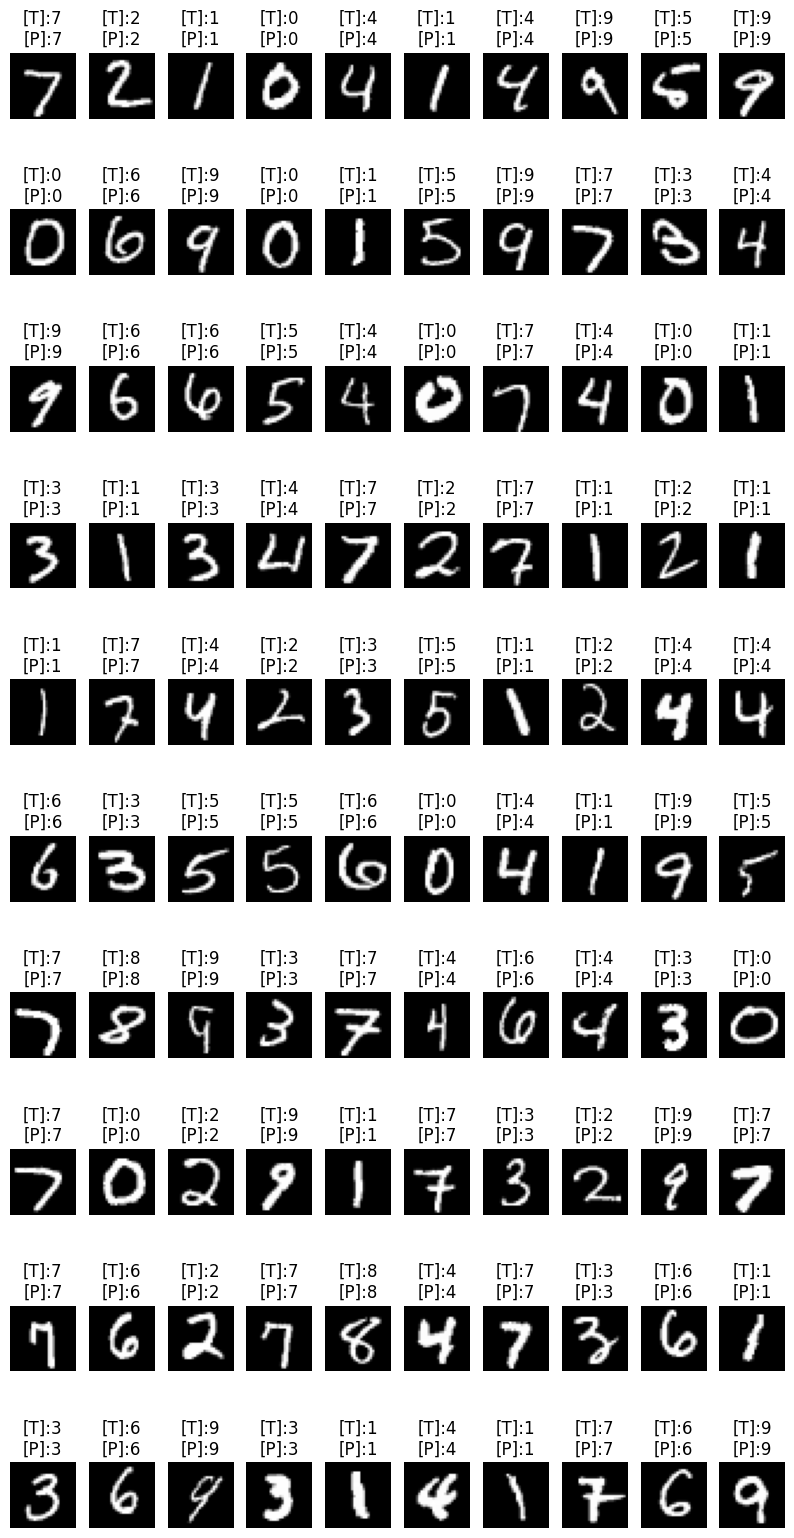

In [ ]:
idx = np.nonzero(pre == y_test)[0]
idx = idx[:100]
plt.figure(figsize=(10, 20))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的正確值
fp_true = y_test[idx]
fp_img = x_test[idx]
for i in range(len(idx)):
  plt.subplot(10, 10, i+1)
  plt.axis("off")
  t = "[T]:{}\n[P]:{}".format(fp_true[i], fp_pred[i])
  plt.title(t)
  plt.imshow(fp_img[i], cmap="gray")

1/1 [==============================] - 0s 18ms/step
0 的機率是 1.2084604e-07
1 的機率是 0.0073571824
2 的機率是 0.016254986
3 的機率是 0.0005163907
4 的機率是 8.206351e-06
5 的機率是 6.340766e-06
6 的機率是 9.381324e-05
7 的機率是 0.00018210363
8 的機率是 0.97558063
9 的機率是 1.8046683e-07
最高機率是: 8


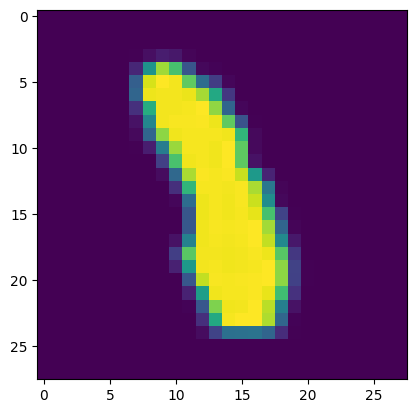

In [ ]:
from PIL import Image
fn = "/1.png" #@param {type:"string"}
img = Image.open(fn).resize([28, 28]).convert("L")

img_np = np.array(img)
testx = img_np.reshape(1, 784)/255.0
probas = model.predict(testx)[0]
for i in range(10):
  print(i, "的機率是", probas[i])
ans = probas.argmax(axis=-1)
print("最高機率是:", ans)
plt.imshow(img)


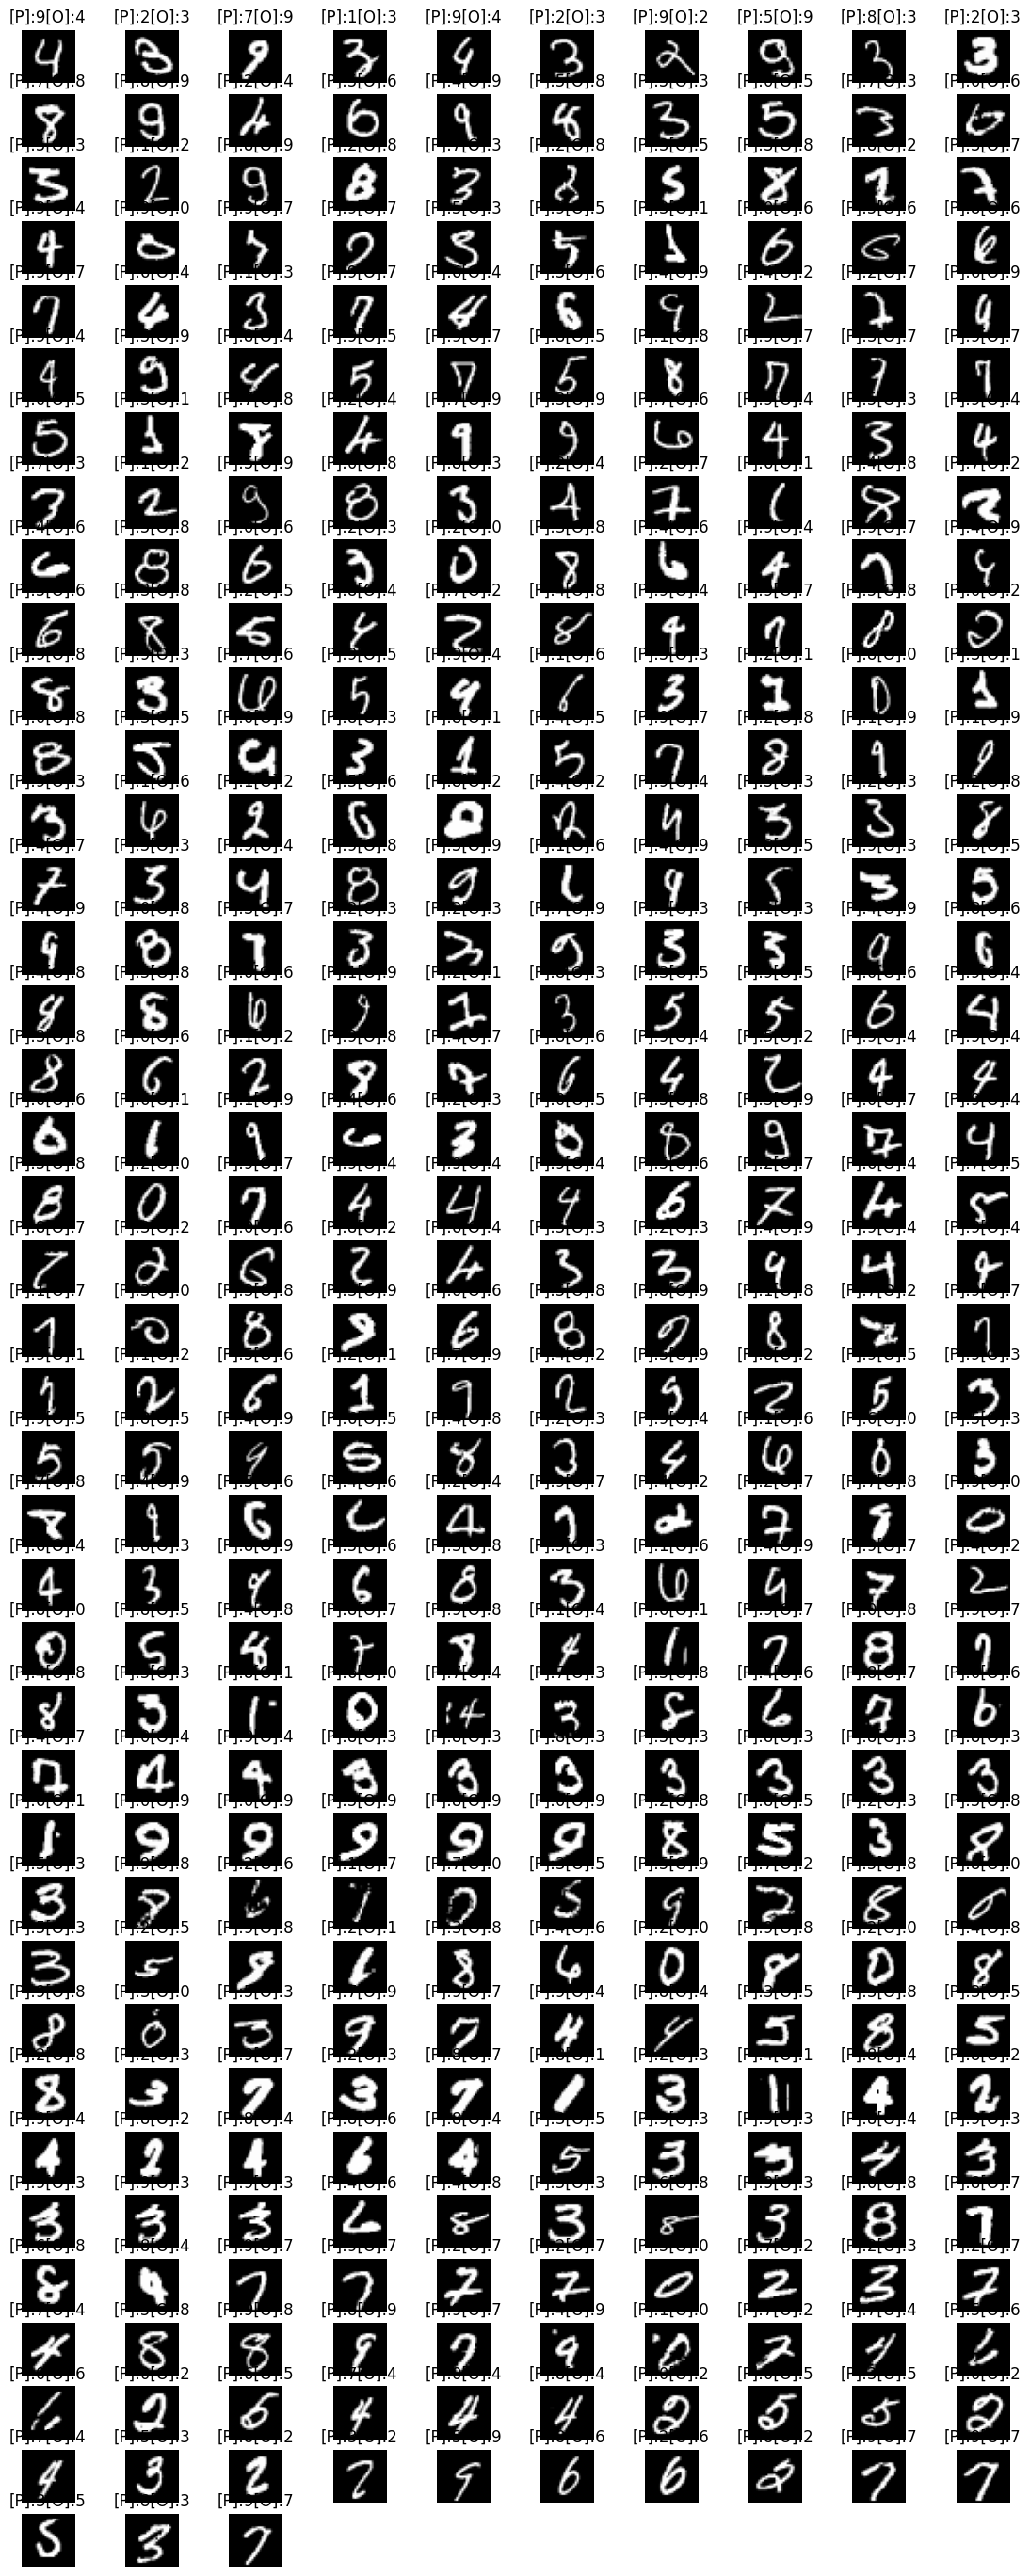

In [ ]:
# numpy 才能直接做每個數字做比較
# 找預測錯誤的index
# list: list[一個index]
# numpy: arraty[多個index]
diff = np.nonzero(pre != y_test)
# predict error ,correct value
orifalse = y_test[diff]
# predict error ,predict value
prefalse = pre[diff]
# 取出原始圖
imagefalse = x_test[diff]
plt.figure(figsize=(14, 35))
width = 10
height = int(len(imagefalse)/10) + 1
for (i, img) in enumerate(imagefalse):
    plt.subplot(height, width, i + 1)
    plt.axis("off") # 去 x_axis, y_axis index
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img, cmap="gray")


In [ ]:
Image.frombytes("L", (28, 28), x_test[0]).save("test.png")
     

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# testx = x_test[0].reshape(1, 784) / 255.0
# model.predict(testx)
     